## Step 1 : Import libraries & the dataset

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [5]:
# read Bikeshare dataset
df_bike = pd.read_csv("C:\\Users\\Darya\\Desktop\\Новая папка (1)\\Github\\World of programming\\Machine learning 2025\\ml\\Seminar 2\\Bike.csv").rename(columns={'cnt' : 'cnt_rental_bike'})

# sample 7 random rows of the dataframe
df_bike.sample(7)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_rental_bike
7318,7319,2011-11-06,4,0,11,13,0,0,0,1,0.46,0.4545,0.51,0.1642,105,209,314
13079,13080,2012-07-04,3,1,7,4,1,3,0,1,0.68,0.6364,0.69,0.2537,5,11,16
7784,7785,2011-11-25,4,0,11,23,0,5,1,1,0.34,0.3485,0.76,0.1045,5,28,33
5354,5355,2011-08-16,3,0,8,0,0,2,1,1,0.64,0.6061,0.69,0.1045,8,23,31
8450,8451,2011-12-23,1,0,12,18,0,5,1,1,0.36,0.3333,0.50,0.2537,4,91,95
3233,3234,2011-05-19,2,0,5,15,0,4,1,1,0.56,0.5303,0.78,0.1642,63,125,188
14533,14534,2012-09-02,3,1,9,18,0,0,0,1,0.74,0.7121,0.74,0.0000,227,273,500


## Step 2 : for the column 'weathersit', replace the values such as :  
1: 'clear'\
2: 'cloudy'\
3: 'light_rain'\
4: 'heavy_rain'

In [6]:
mapping = {
    1: 'clear' ,2: 'cloudy' ,3: 'light_rain' ,4: 'heavy_rain'
}
df_bike['weathersit'] = df_bike['weathersit'].map(mapping)
df_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_rental_bike
0,1,2011-01-01,1,0,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,clear,0.26,0.2727,0.56,0.1343,13,48,61


## Step 3 : Using pandas only, explore your dataset

In [7]:
print(df_bike.info())
print()
print(df_bike.describe())
print()
print(df_bike['weathersit'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season           17379 non-null  int64  
 3   yr               17379 non-null  int64  
 4   mnth             17379 non-null  int64  
 5   hr               17379 non-null  int64  
 6   holiday          17379 non-null  int64  
 7   weekday          17379 non-null  int64  
 8   workingday       17379 non-null  int64  
 9   weathersit       17379 non-null  object 
 10  temp             17379 non-null  float64
 11  atemp            17379 non-null  float64
 12  hum              17379 non-null  float64
 13  windspeed        17379 non-null  float64
 14  casual           17379 non-null  int64  
 15  registered       17379 non-null  int64  
 16  cnt_rental_bike  17379 non-null  int64  
dtypes: float64(4

In [8]:
df_bike.duplicated().sum()

np.int64(0)

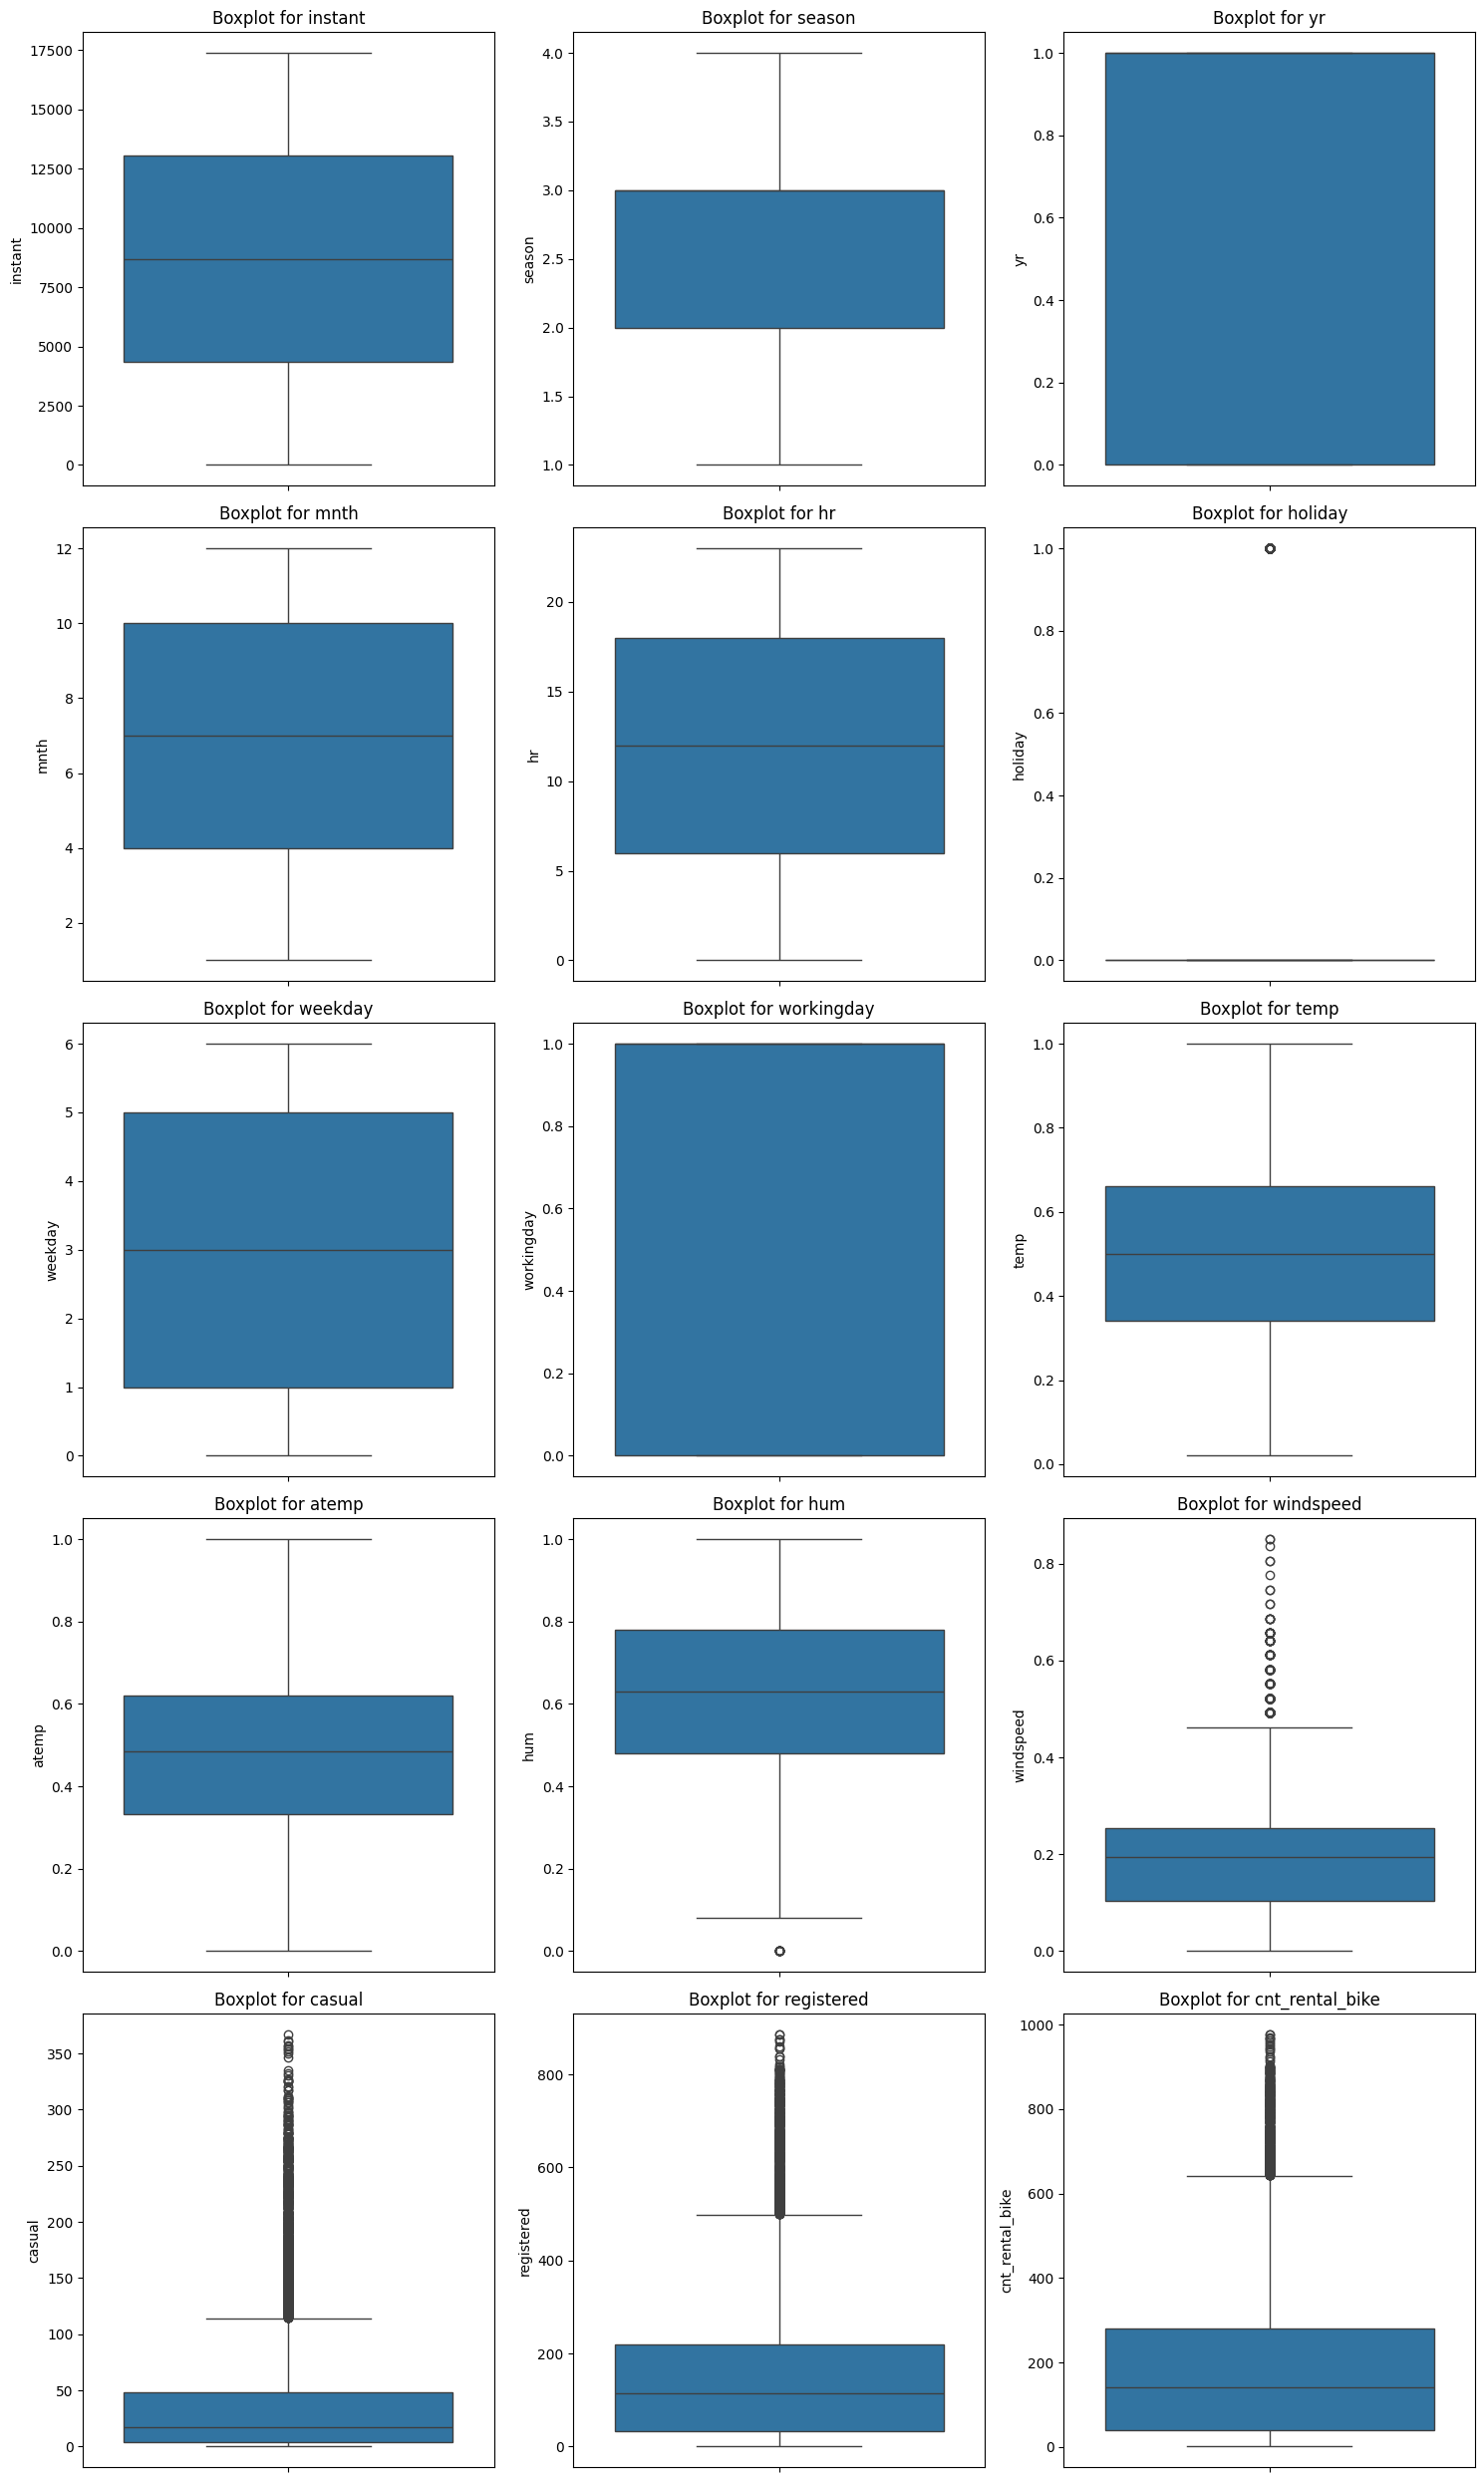

In [9]:
def draw_box_plots(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    
    
    n = len(numerical_cols)
    n_rows = int(np.ceil(n / 3))
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
    
    axes = axes.flatten()
    
    for i, column in enumerate(numerical_cols):
        sns.boxplot(data=df[column], ax=axes[i])
        axes[i].set_title(f"Boxplot for {column}")
    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()


draw_box_plots(df_bike)

# As we can see: columns casual, registered, cnt_rental_bike have outliers.

## To resolve this, we will use min-max scalling

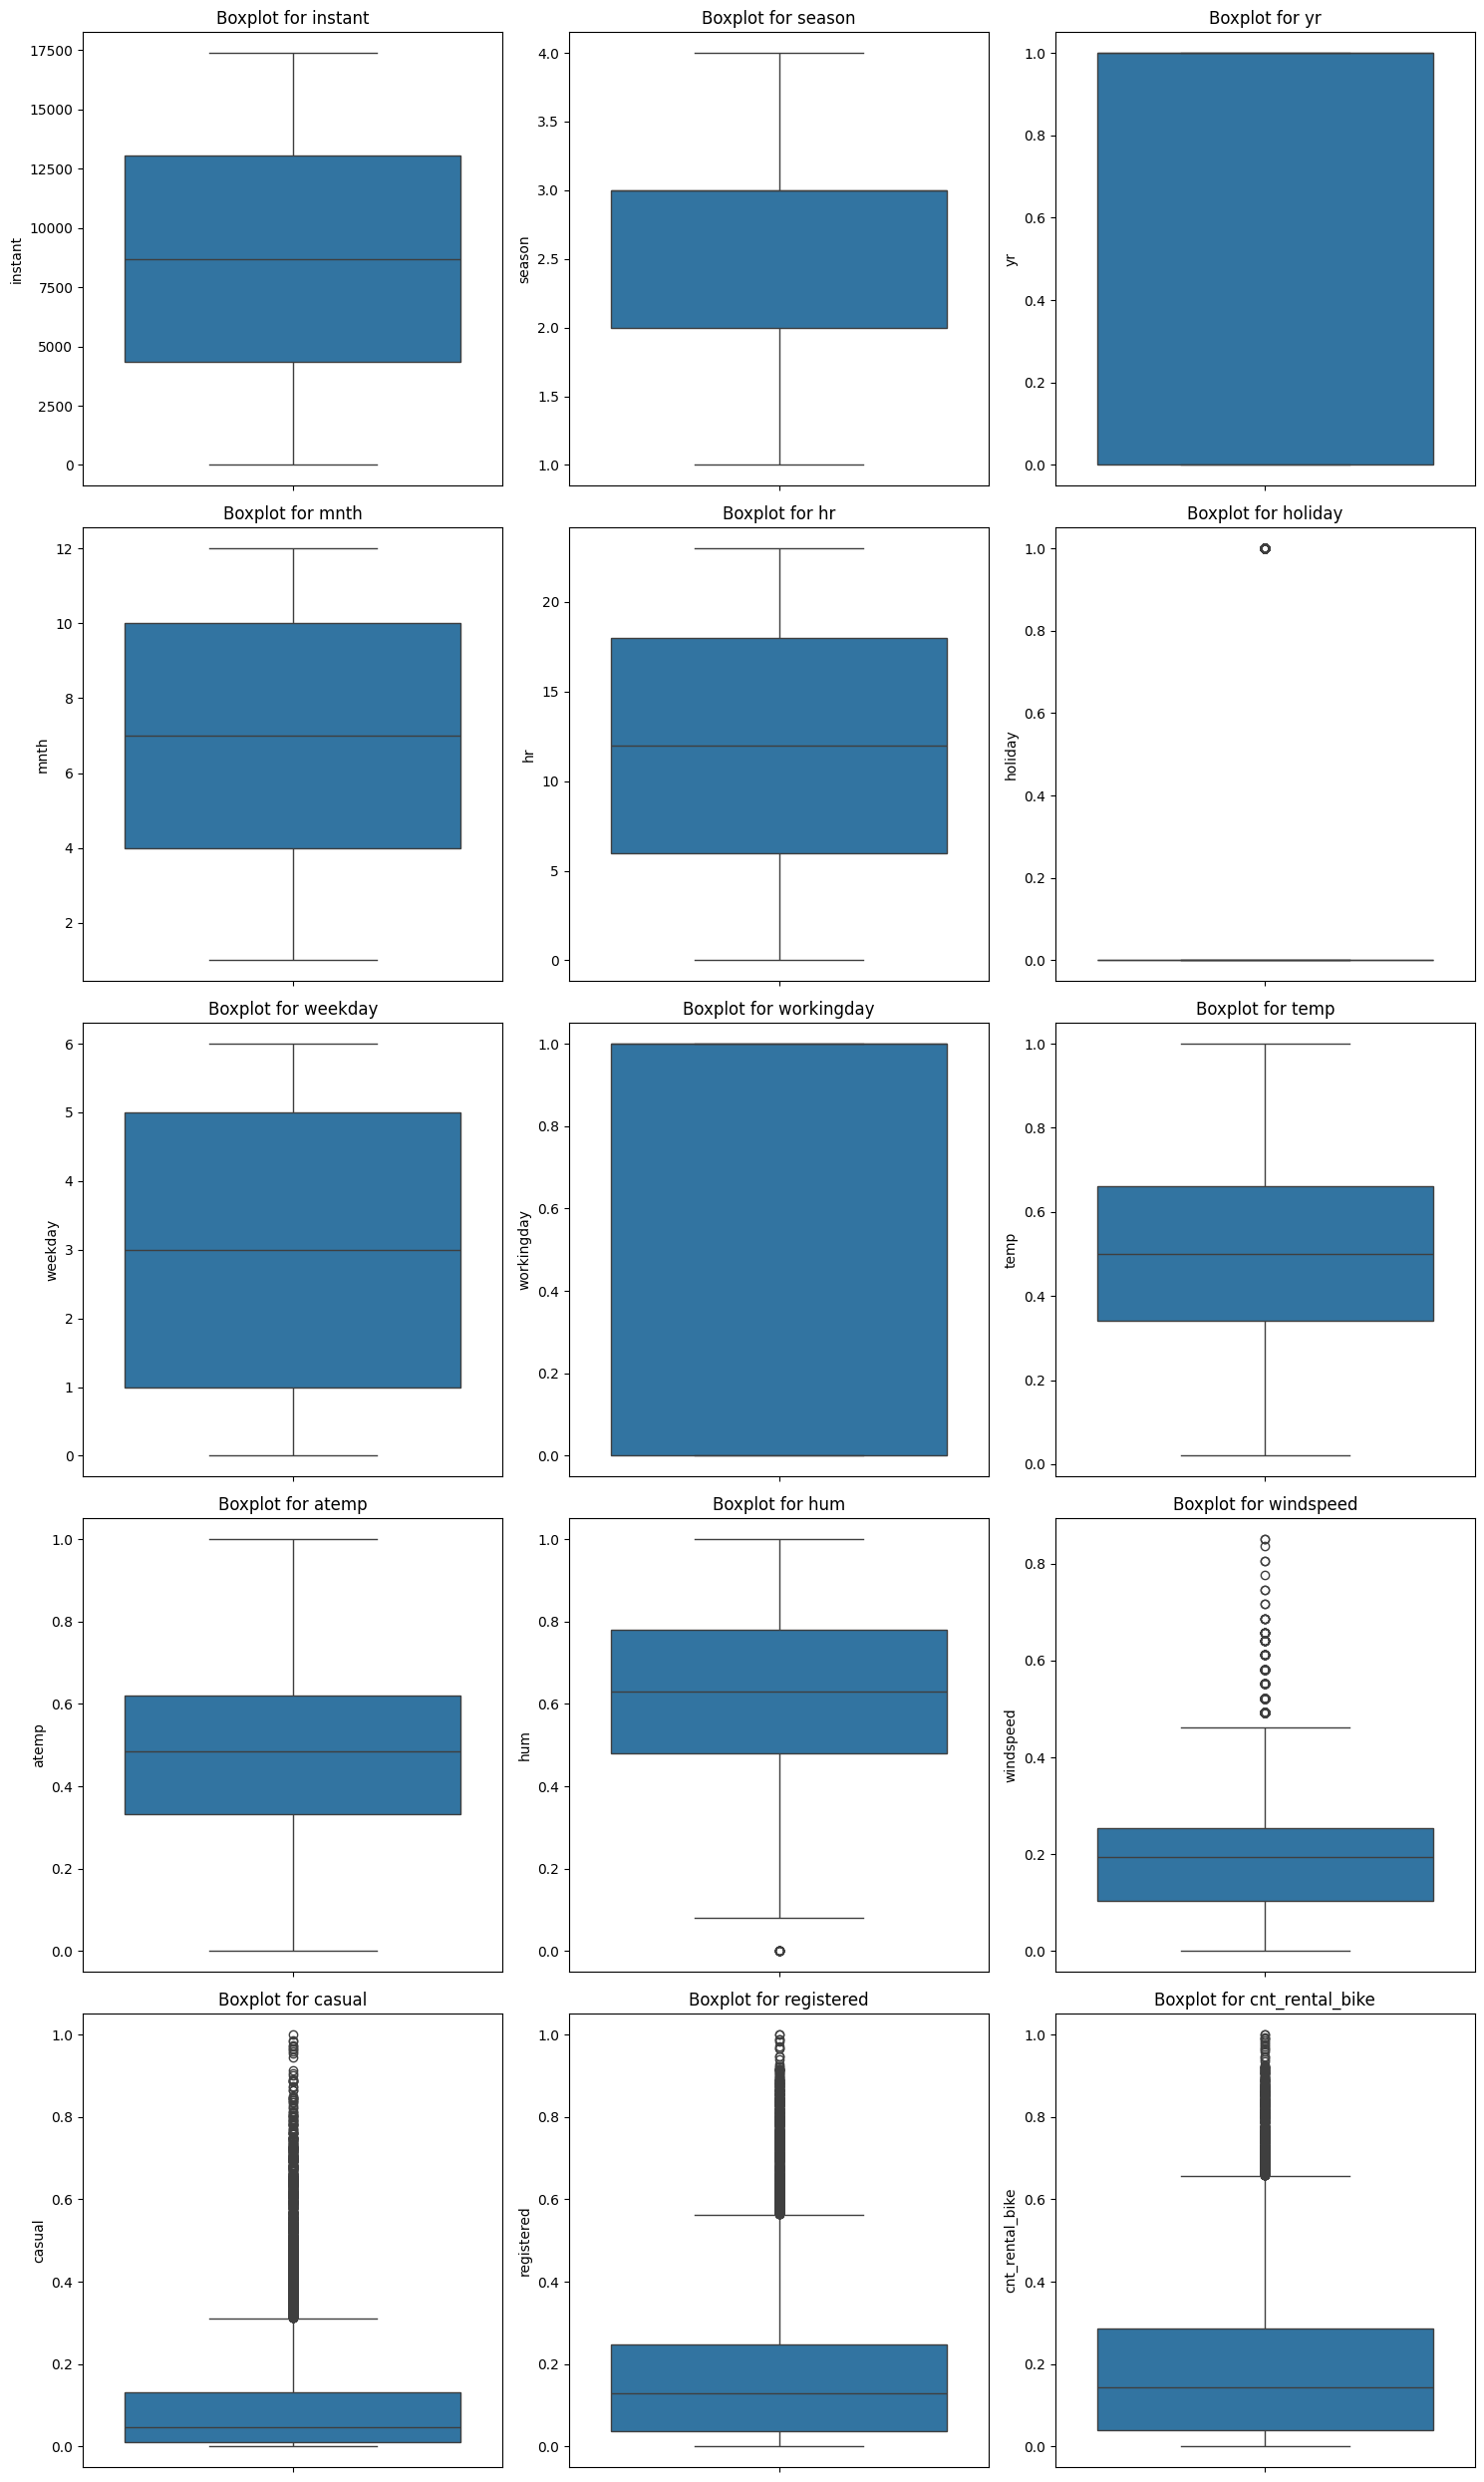

In [10]:
scaler = MinMaxScaler()
scaled_df = df_bike.copy()

columns_to_scale = ['casual', 'registered', 'cnt_rental_bike']

scaled_df[columns_to_scale] = scaler.fit_transform(scaled_df[columns_to_scale])
draw_box_plots(scaled_df)

# or we may use a standard scaler

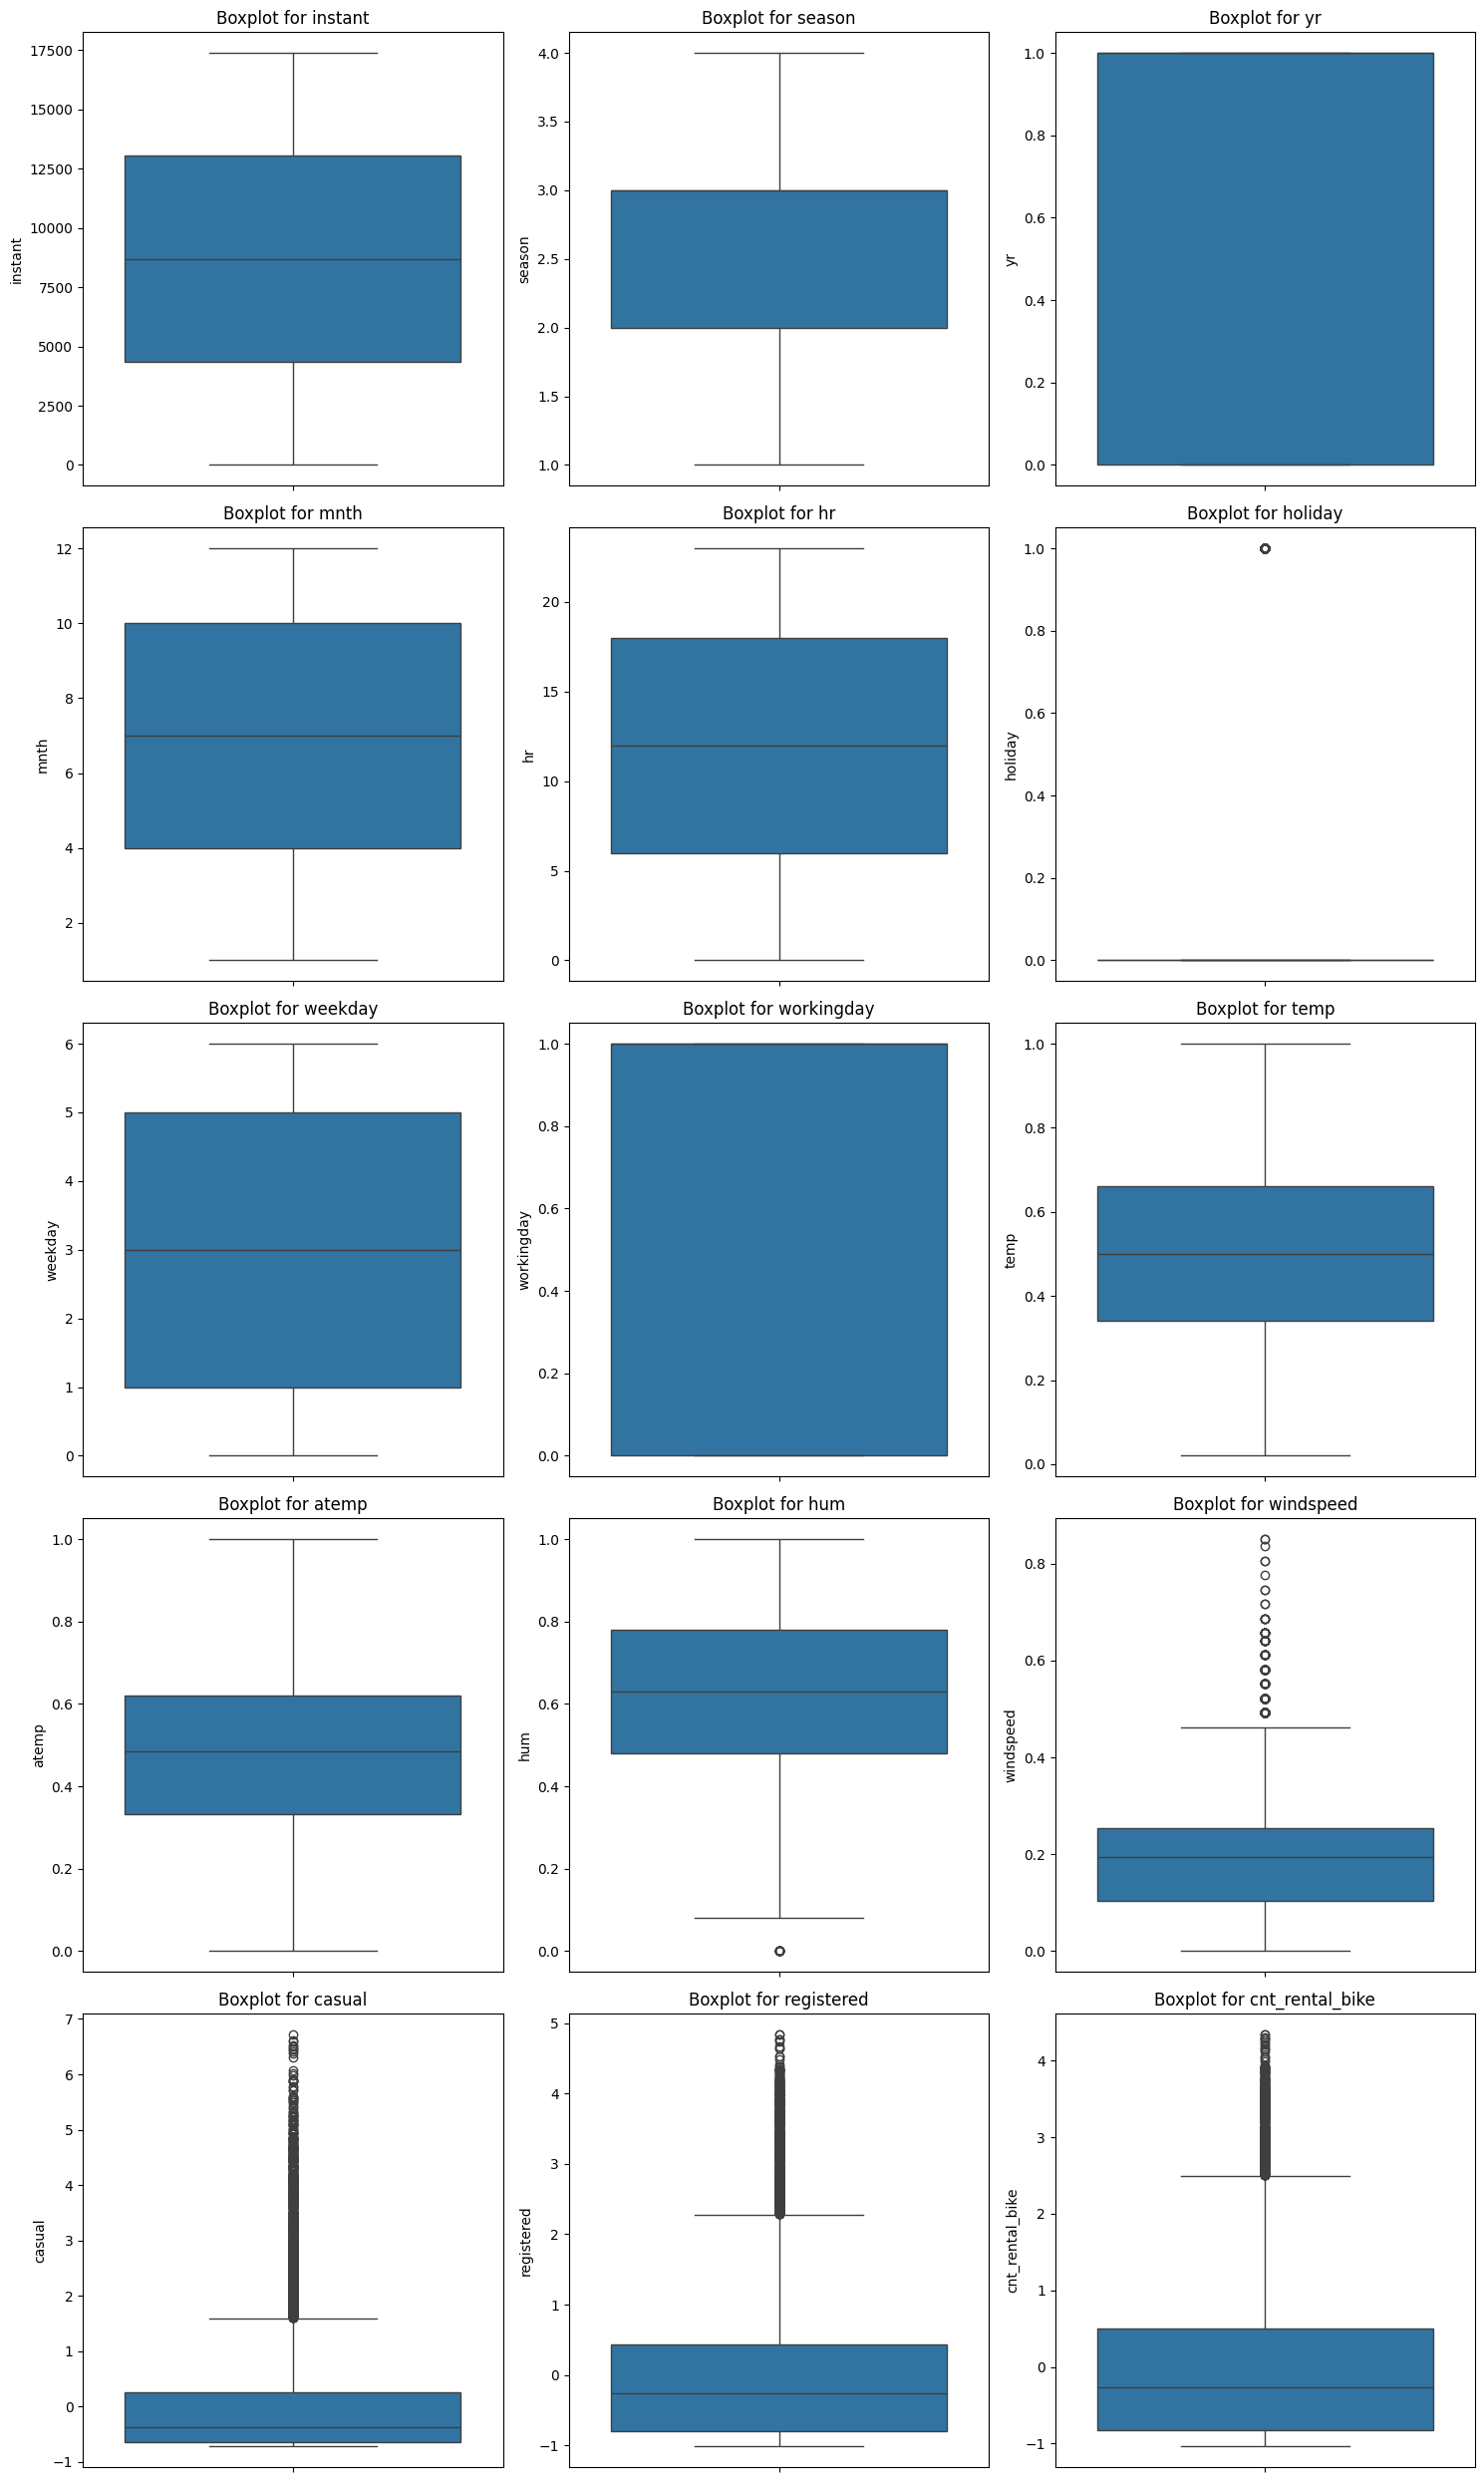

In [11]:
scaler = StandardScaler()
scaled_df = df_bike.copy()

columns_to_scale = ['casual', 'registered', 'cnt_rental_bike']

scaled_df[columns_to_scale] = scaler.fit_transform(scaled_df[columns_to_scale])
draw_box_plots(scaled_df)

# Differences between scaling methods:

Min max:
1) Min max scales the values between a specified range, usually [0, 1].
2) This technique is useful when you want to transform the data into a bounded range, typically [0, 1]. It’s often used when the model expects data in a specific range
3) Sensitive to Outliers
4) No Assumptions About Distribution:

Standard: 
1) Standardization does not bound the values to a fixed range.
2) typically used when the data follows a Gaussian (normal) distribution
3) Not Sensitive to Outliers:
4) Assumes Gaussian Distribution:

## Or we may change the outliers to median

In [12]:
def insert_median_values(df, column_name):
    median_from_df = df[column_name].median()
    return median_from_df

def define_big_value_not_normal(df, column):
    inter_quantile = df[column].quantile(0.75) - df[column].quantile(0.25)
    biggest_threshold = df[column].quantile(0.75) + inter_quantile
    smallest_threshold = df[column].quantile(0.25) - inter_quantile
    return smallest_threshold, biggest_threshold

problem_columns = ['casual', 'registered', 'cnt_rental_bike']

for column in problem_columns:
    small_val, big_val = define_big_value_not_normal(df_bike, column)
    if column != 'revenue':
        print(f'In columns {column} detected {len(df_bike[df_bike[column] < small_val])} low-outliers и {len(df_bike[df_bike[column] > big_val])} high-outliers')
        
        df_bike[column] = df_bike[column].apply(
            lambda x: insert_median_values(df_bike, column) 
            if (x < small_val or x > big_val)
            else x
        )

In columns casual detected 0 low-outliers и 1727 high-outliers
In columns registered detected 0 low-outliers и 1237 high-outliers
In columns cnt_rental_bike detected 0 low-outliers и 1117 high-outliers


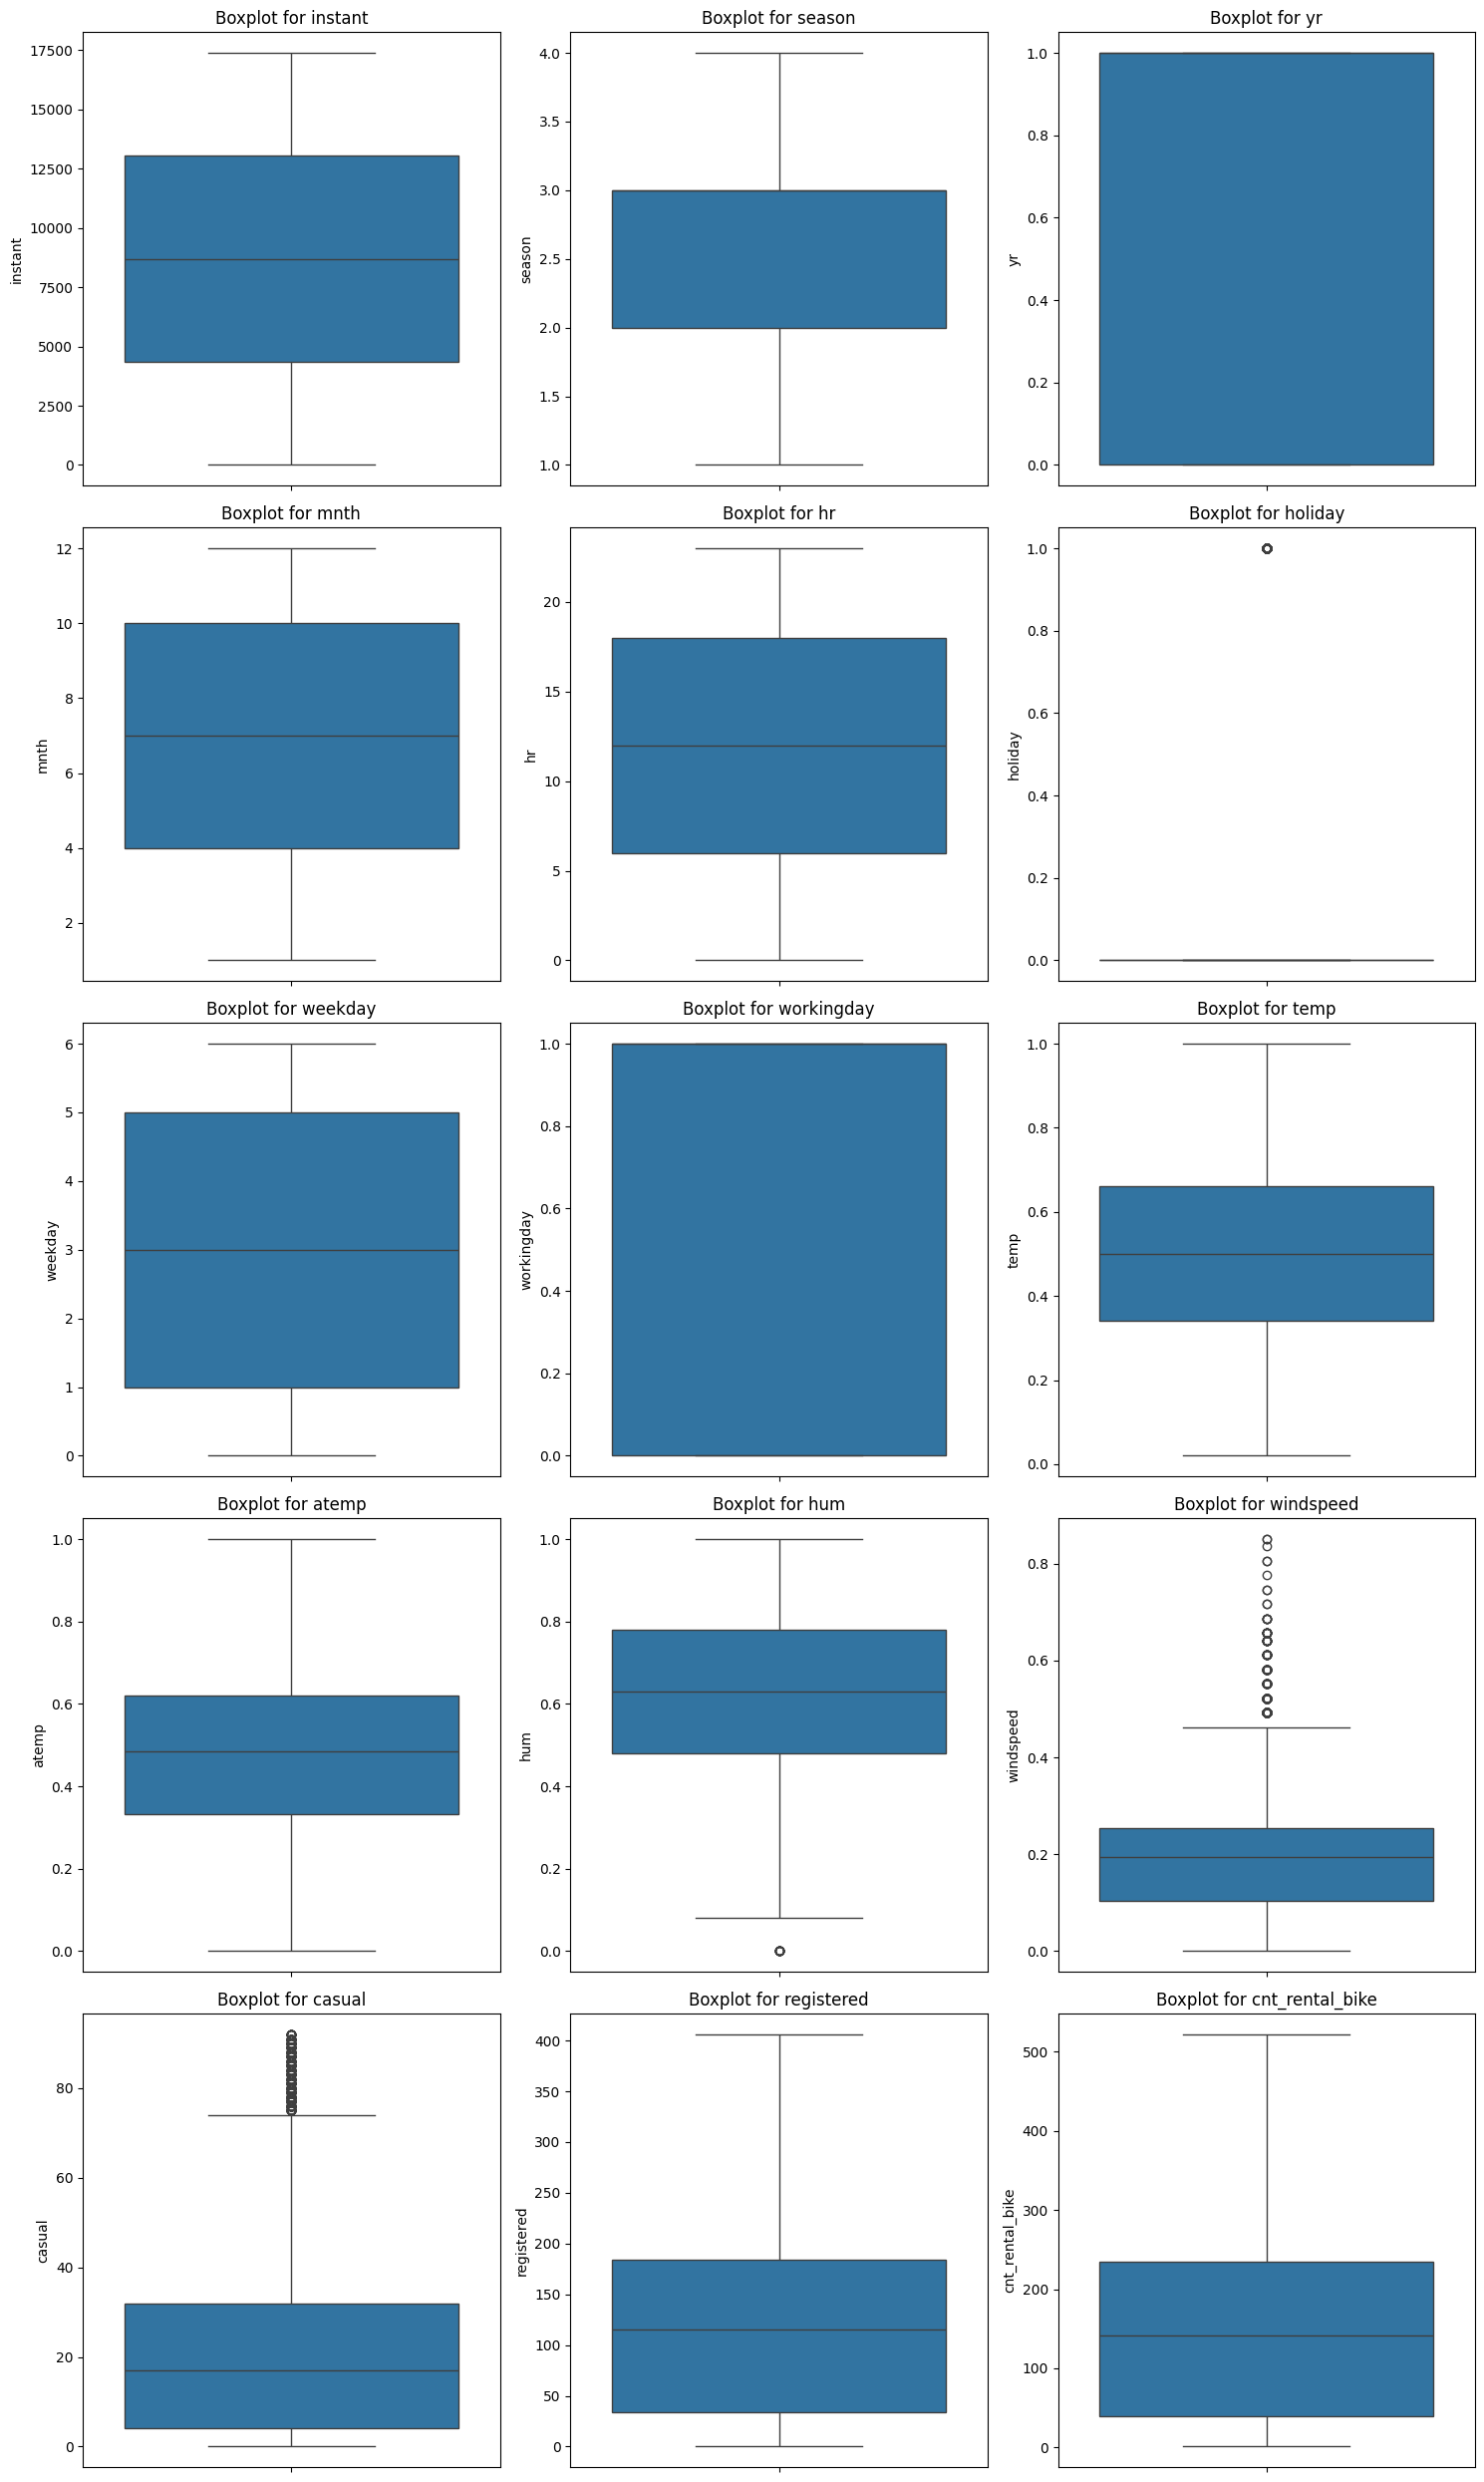

In [13]:
draw_box_plots(df_bike)

## Step 4 : The dataset has several columns related to date/time:

Create a new column `datetime` which will store information about both date and time.

In [14]:
df_bike['dteday'] = pd.to_datetime(df_bike['dteday'])
df_bike['datetime'] = df_bike['dteday'] + pd.to_timedelta(df_bike['hr'], unit='h')
df_bike['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
17374   2012-12-31 19:00:00
17375   2012-12-31 20:00:00
17376   2012-12-31 21:00:00
17377   2012-12-31 22:00:00
17378   2012-12-31 23:00:00
Name: datetime, Length: 17379, dtype: datetime64[ns]

## Step 5 : Vizualize the seasonality of rental bike

Text(0.5, 1.0, 'Bike Rentals Over Time')

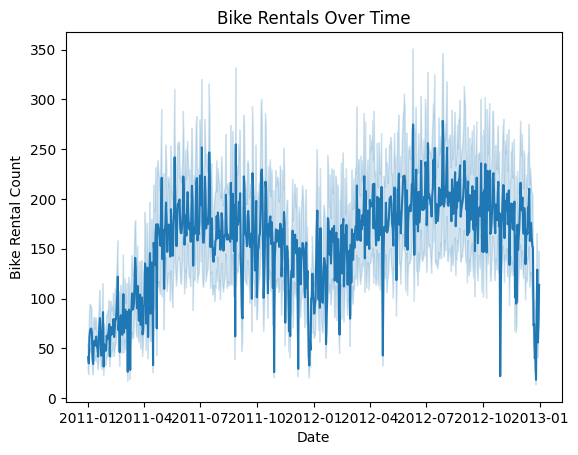

In [15]:
df_bike['dteday'] = pd.to_datetime(df_bike['dteday'])
sns.lineplot(x='dteday', y='cnt_rental_bike', data=df_bike)
plt.xlabel('Date')
plt.ylabel('Bike Rental Count')
plt.title('Bike Rentals Over Time')

## Step 6 : What's the datatype of 'Wheathersit'

In [16]:
print(df_bike['weathersit'].dtype)

object


## Step 7 : Count the values of Wheathersit and plot its distribution

weathersit
clear         11413
cloudy         4544
light_rain     1419
heavy_rain        3
Name: count, dtype: int64


<Axes: xlabel='weathersit', ylabel='Count'>

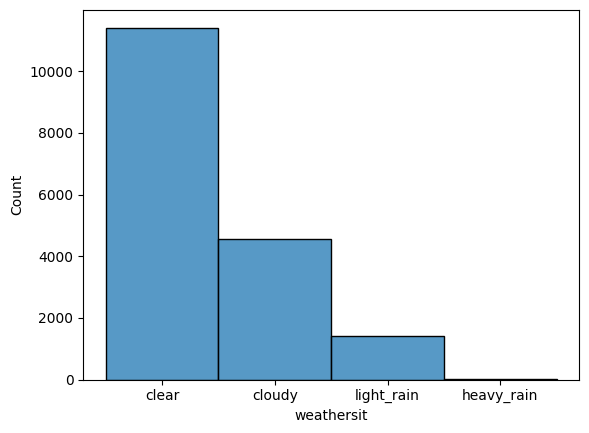

In [17]:
counter = df_bike['weathersit'].value_counts()
print(counter)
sns.histplot(df_bike['weathersit'])

## Step 8 : What's the number of $K$ in this column.

In [18]:
counter = df_bike['weathersit'].unique()
counter.size

4

## Step 9 : Implement your own One-Hot-Encoding algorithm. Encode weathersit column

In [19]:
values = df_bike['weathersit'].unique()
encoded_df = df_bike.copy()
for val in values:
    encoded_df[val] = (encoded_df['weathersit'] == val).astype(int)

only_encoded = encoded_df[list(values)].astype(float)
only_encoded.columns = ['weathersit_' + i for i in only_encoded.columns]
only_encoded

,weathersit_clear,weathersit_cloudy,weathersit_light_rain,weathersit_heavy_rain
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
17374,0.0,1.0,0.0,0.0
17375,0.0,1.0,0.0,0.0
17376,1.0,0.0,0.0,0.0
17377,1.0,0.0,0.0,0.0


## Step 10 : Use scikit-learn OHE encoder for the same column

In [20]:
encoder = OneHotEncoder(sparse_output=False) 
encoded = encoder.fit_transform(df_bike[['weathersit']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['weathersit']))
encoded_df

# copy_df = df_bike.copy()
# copy_df = pd.concat([copy_df, encoded_df], axis=1)
# 
# copy_df

,weathersit_clear,weathersit_cloudy,weathersit_heavy_rain,weathersit_light_rain
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
17374,0.0,1.0,0.0,0.0
17375,0.0,1.0,0.0,0.0
17376,1.0,0.0,0.0,0.0
17377,1.0,0.0,0.0,0.0


## Step 11 : Compare your encoded columns with the SKLearn ones

In [21]:
((encoded_df['weathersit_clear'] == only_encoded['weathersit_clear']) == False).sum()

np.int64(0)

In [22]:
((encoded_df['weathersit_cloudy'] == only_encoded['weathersit_cloudy']) == False).sum()

np.int64(0)

In [23]:
((encoded_df['weathersit_heavy_rain'] == only_encoded['weathersit_heavy_rain']) == False).sum()

np.int64(0)

In [24]:
((encoded_df['weathersit_light_rain'] == only_encoded['weathersit_light_rain']) == False).sum()

np.int64(0)

## Step 12 : Modify your algorithm to drop one column while encoding

In [25]:
values = df_bike['weathersit'].unique()
encoded_df = df_bike.copy()
for val in values:
    encoded_df[val] = (encoded_df['weathersit'] == val).astype(int)

only_encoded = encoded_df[list(values[:-1:])].astype(float)
only_encoded.columns = ['weathersit_' + i for i in only_encoded.columns]
only_encoded

,weathersit_clear,weathersit_cloudy,weathersit_light_rain
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
17374,0.0,1.0,0.0
17375,0.0,1.0,0.0
17376,1.0,0.0,0.0
17377,1.0,0.0,0.0


## Step 13 : What are advantages and disadvantages of such encoding of a categorical varable? Does the answer depend on whether it is nominal or ordinal?

1) No dependency
2) No bias 
3) Handling Non-Numeric Data
4) Simplicity and Interpretability

For ordinal: 
1) Loss of Information for Ordinal Data (low, medium, high = 0 or 1)
2) Increased Training Time (more features)

## Step 14 : What can be said about linear dependence of the columns produced by one-hot-encoding? Consider two cases: with and without dropping.

Without Dropping a Category Column: 
1) The sum of the one-hot encoded columns will always be 1
2) the columns are not independent
A+B+C=1

With Dropping a Category Column:
1) The columns are linearly dependent. This is because the sum of the one-hot encoded columns for each row is always 1.
2) we eliminate the redundancy


## Step 15 : Repeat the steps 7 to 9, for label encoding

     weathersit_clear  weathersit_cloudy  weathersit_light_rain
0.0              5966              12835                  15960
1.0             11413               4544                   1419


<Axes: ylabel='Count'>

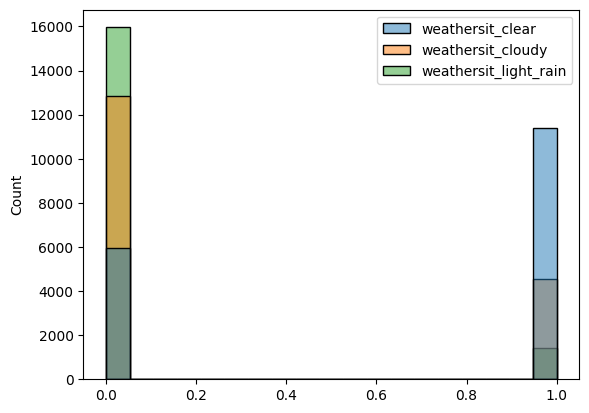

In [26]:
category_counts = only_encoded.apply(pd.Series.value_counts)
print(category_counts)
sns.histplot(only_encoded)

In [27]:
category_counts.index.size

2